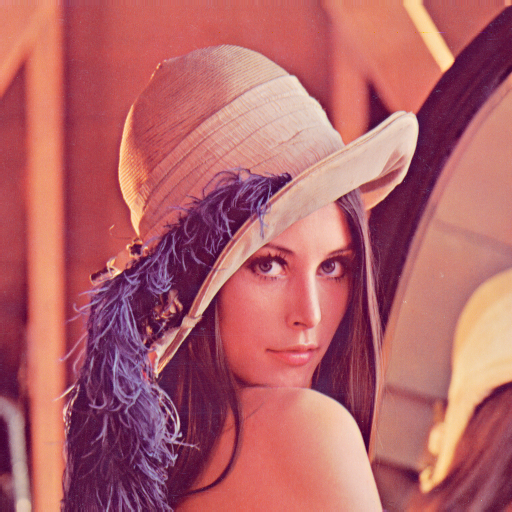

In [ ]:
from PIL import Image

# display the image
image_colored = Image.open("/content/Lenna_(test_image).png")
display(image_colored)


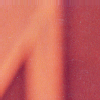

In [ ]:
import numpy as np

image_array = np.array(image_colored)

# Extract the top-left 100x100 pixels
top_left_corner = image_array[:100, :100]  # Slicing the first 100 rows and columns

# Convert back to Image format for display
top_left_image = Image.fromarray(top_left_corner)

# Display the cropped image
display(top_left_image)


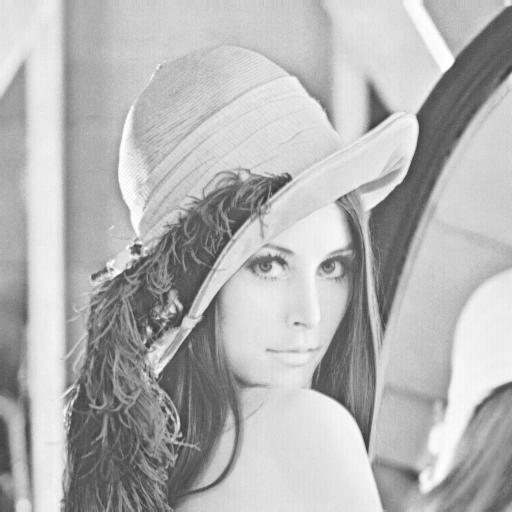

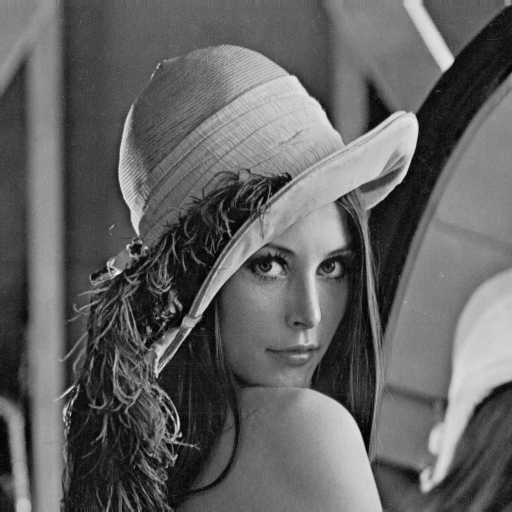

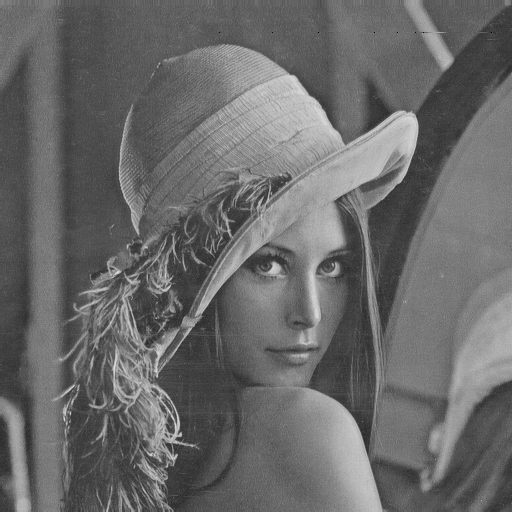

In [ ]:
# Assuming image_colored is already defined and loaded above
# Get the R, G, and B channels
r , g , b = image_colored . split ()
# Display or further process the individual channels
display ( r )
display ( g )
display ( b )

In [ ]:
1 # Get the size (width , height ) and channels (RGB)
width , height = image_colored . size
channels = len( image_colored . getbands () ) # For RGB , it will be 3
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_colored = width * height *3
print ( f" Image size (RGB): { image_size_colored }")

 Image shape (RGB): (512 , 512 , 3)
 Image size (RGB): 786432


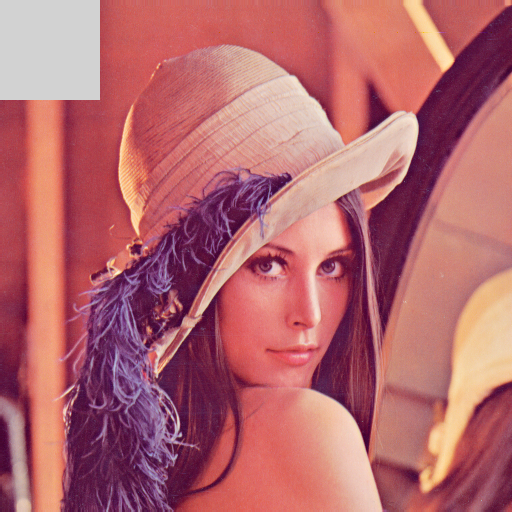

In [ ]:
# Modify the top-left 100x100 pixels to 210 (light gray)
image_array[:100, :100] = 210

# Convert back to an Image
modified_image = Image.fromarray(image_array.astype(np.uint8))

# Display the modified image
display(modified_image)

In [ ]:
# Create a NumPy array (Here , we use a dummy array forillustration )
image_array = np . zeros ((100 , 100 , 3) , dtype = np . uint8 ) #Example : black image
# Convert the NumPy array back to a Pillow Image object
image_from_array = Image . fromarray ( image_array )
# Display the image
image_from_array . show ()
# Optionally save the image to a file
image_from_array . save ("output_image.png")

Exercise 2

In [ ]:
# Load image and convert to grayscale
image = Image . open ("cameraman.png") . convert ("L")
# Convert to NumPy array
image_array = np . array ( image )
# Get image dimensions
height , width = image_array . shape
# Reshape the image into a 2D array where each row represents a row of pixels
# This allows PCA to process each row as an observation and find patterns across pixel intensities
data = image_array . reshape ( height , width )

In [ ]:
# Compute the mean of each column ( feature )
mean = np . mean ( data , axis =0)
# Subtract mean to center the data
centered_data = data - mean


In [ ]:
# Compute covariance matrix
cov_matrix = np . cov ( centered_data , rowvar = False )


In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
# Sort eigenvalues and corresponding eigenvectors indescending order
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]


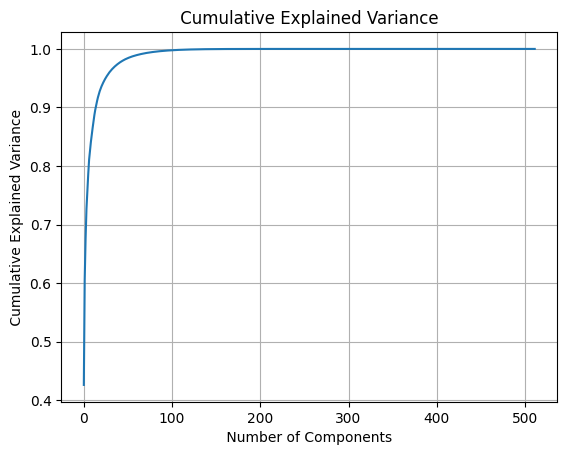

In [ ]:
import matplotlib . pyplot as plt
#Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [ ]:
k = 50 # Choose k principal components
components = eigenvectors [: , : k ]


In [ ]:
# Project the data onto the principal components
compressed_data = np . dot ( centered_data , components )

In [ ]:
# Reconstruct the image from compressed data
decompressed_data = np . dot ( compressed_data , components . T ) + mean

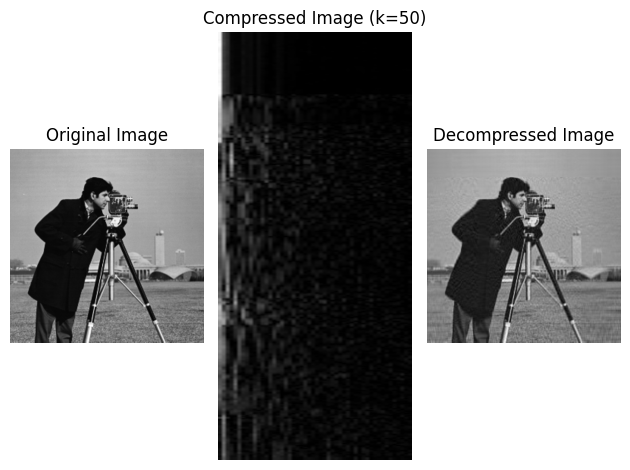

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(np.abs(compressed_data), cmap="gray", aspect="auto")
plt.title(f"Compressed Image (k={k})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(decompressed_data, cmap="gray")
plt.title("Decompressed Image")
plt.axis("off")

plt.tight_layout()
plt.show()